# Exercicis del tema 7

In [149]:
%load_ext asymagic

def mcm_llista(llista):
    if len(llista) == 0:
        return 1
    mcm = llista[0]
    for i in llista[1:]:
        mcm = mcm * i // gcd(mcm, i)
    return mcm

def completa_quadrats(expr,vi,vf):
    """
    Completa quadrats en un polinomi de segon grau
    """
    l = len(vi)
    d2 = [diff(expr,t,2)/2 for t in vi]
    zeros = len([t for t in d2 if t != 0])
    if zeros < len(d2) - 1:
        print("Expressió no vàlida")
        return None, None
    d1 = [diff(expr,t) for t in vi]
    d1 = [d1[i] - 2*d2[i]*vi[i] for i in range(l)]
    ti = expr - sum([d2[i]*vi[i]^2 + d1[i]*vi[i] for i in range(l) if d2[i] != 0])
    c = [d1[i]/(2*d2[i]) if d2[i] != 0 else 0 for i in range(l)]
    if zeros == len(d2):
        s = sum([d2[i]*vf[i]^2 for i in range(l)]) == -ti + sum([d2[i]*c[i]^2 for i in range(l)])
        r = [vf[i] == vi[i] + c[i] for i in range(l)]
        return s, r
    ti = expr - sum([d2[i]*vi[i]^2 + d1[i]*vi[i] for i in range(l)])
    ti -= sum([d2[i]*c[i]^2 for i in range(l)])
    k = d2.index(0)
    s = vf[k] == - sum([d2[i]*vf[i]^2 for i in range(l)])/d1[k]
    r = [vf[i] == vi[i] + c[i] if d2[i] != 0 else vf[i] == vi[i] + ti/d1[k] for i in range(l)]
    return s,r

def centre_conica_quadrica(Q,L):
    """
    Retorna un centre, si és possible, d'una cònica o una quàdrica.
    """
    try:
        C = Q.solve_right(-L)
        return vector(C)
    except:
        return []

def gram_schmidt(vecs):
    """
    Aplica el mètode de Gram-Schmidt a una llista de vectors
    """
    v = []
    for u in vecs:
        if len(v) == 0:
            v.append(simplifica_vector(u))
            continue
        w = u - sum([u.dot_product(x)/x.dot_product(x)*x for x in v])
        v.append(simplifica_vector(w))
    return v
    
def diagonalitza_matriu_simetrica(A):
    """
    Retorna els valors propis i una base ortogonal amb orientació
    positiva de vectors propis d'una matriu simètrica A
    """
    if A.T != A:
        return None
    D, C = Q.eigenmatrix_right()
    d = D.nrows()
    vaps = [D[i,i] for i in range(d)]
    veps = gram_schmidt([vector(u) for u in C.columns()])
    l = list(zip(vaps,veps))
    p = sorted([x for x in l if x[0] > 0],key=lambda x: x[0])
    n = sorted([x for x in l if x[0] < 0],key=lambda x: -x[0])
    z = [x for x in l if x[0] == 0]
    l = p + n + z
    vaps, veps = zip(*l)
    if d == 2:
        if veps[0][0] < 0:
            veps = (vector((-veps[0][0],-veps[0][1])),vector((veps[1][0],veps[1][1])))
        if veps[1][1] < 0:
            veps = (vector((veps[0][0],veps[0][1])),vector((-veps[1][0],-veps[1][1])))
    elif d == 3:
        v1 = simplifica_vector(veps[0])
        v2 = simplifica_vector(veps[1])
        v3 = v1.cross_product(v2)
        v3 = simplifica_vector(v3,signe=False)
        veps = (v1,v2,v3)
    return vaps, veps

def equacio_reduida_conica_quadrica_amb_centre(Q,L,f,vaps,centre,nulla=False):
    """
    Retorna l'equació reduïda d'una cònica o quàdrica amb centre
    """
    x1, y1, z1 = var('x1 y1 z1')
    X = vector([x1,y1,z1])
    n = Q.nrows()
    q = sum([vaps[i]*X[i]^2 for i in range(n)])
    f1 = centre*Q*centre + 2*L*centre + f
    if f1 != 0:
        if nulla:
            return q + f1 == 0
        else:
            eq = q == -f1
            return - eq / f1
    mcm = mcm_llista([x for x in vaps if x != 0])
    if nulla:
        eq = q == 0
    else:
       eq = q == 0
    return eq / abs(mcm)

def semieixos_ellipse_hiperbola(Q,L,f,l,centre):
    """
    Retorna els  d'una ellipse o hipèrbola
    """
    f1 = simplificar_radicals(centre*Q*centre + 2*L*centre + f)
    a2, b2 = simplificar_radicals([-f1/l[0],-f1/l[1]])
    if a2*b2 > 0:
        a2, b2 = abs(a2), abs(b2)
        if a2 > b2:
            return list(map(simplificar_radicals,[sqrt(a2),sqrt(b2)]))
        else:
            return list(map(simplificar_radicals,[sqrt(b2),sqrt(a2)]))
    else:
        if a2 * f1 > 0:
            return list(map(simplificar_radicals,[sqrt(abs(a2)),sqrt(abs(b2))]))
        else:
            return list(map(simplificar_radicals,[sqrt(abs(b2)),sqrt(abs(a2))]))
    return None
    
def normalitza(l):
    """
    Retorna la llista de vectors normalitzats
    """
    t = list(l)
    return [u.normalized() for u in t]

def primer_no_nul(vec):
    """
    Retorna l'index del primer element no nul d'un vector
    """
    try:
        for k in range(vec.length()):
            if v[k] != 0:
                return k
    except:
        return None
    return None

def simplifica_vector(v,signe=True):
    """
    Retorna el vector simplificat
    """
    f = []
    for r in v:
        if isinstance(r,Rational):
            f.append(r.denom())
    if len(f) > 0:
        n = prod(f)/gcd(f)
        v = n*v
    f = []
    for r in v:
        f.append(r)
    try:
        n = gcd(f)
        v = v/n
    except:
        pass
    if not signe:
        return v
    k = primer_no_nul(v)
    if k is not None and v[k] < 0:
        return -v
    return v

def coordenades_en_canonica(ref,l):
    """
    Retorna les coordenades en la referència canònica dels punts que
    tenen coordenades "l" en la referència "ref"
    """
    if isinstance(l,list) or isinstance(l,tuple):
        if len(l) == 0:
            return None
        res = []
        for p in l:
            n = len(p)
            res.append(vector(ref[0]) + sum([p[i]*ref[1][i] for i in range(n)]))
        return res
    n = len(l)
    return vector(ref[0]) + sum([l[i]*ref[1][i] for i in range(n)])

def components_en_canonica(base,l):
    """
    Retorna les components en la base canònica del vector que
    té components "l" en la base "base"
    """
    if len(l) == 0:
        return None
    res = []
    for v in l:
        n = len(v)
        res.append(sum([v[i]*base[i] for i in range(n)]))
    return res

def equacio_reduida_parabola(L,vaps,veps,nulla=False):
    """
    Retorna l'equació reduïda d'una paràbola
    """
    x1, y1 = var('x1 y1')
    X = vector([x1,y1])
    v = veps[1]
    v = v.normalized()
    if nulla:
        eq = (2*v*L)*y1 + vaps[0]*x1^2 == 0
    else:
        eq = y1 == - vaps[0]*x1^2/(2*v*L)
    return eq

def parametre_parabola(L,vaps,veps):
    """
    Retorna el paràmetre d'una paràbola
    """
    v = veps[1]
    v = v.normalized()
    p = abs(v*L/vaps[0])
    return p

def vertex_parabola(Q,L,f,vaps,veps):
    """
    Retorna el vèrtex d'una paràbola
    """
    x, y = var('x y')
    X = vector([x,y])
    v = veps[0]
    s = vaps[0]*v*X + v*L == 0
    p = X*Q*X + 2*L*X + f == 0
    sol = solve([s,p],[x,y])
    return vector([sol[0][0].right(),sol[0][1].right()])

def focus_parabola(Q,L,f,vertex,vaps,veps):
    """
    Retorna el focus de la paràbola
    """
    v1 = veps[1]
    v1 = v1.normalized()
    v0 = veps[0]
    v0 = v0.normalized()
    p = -v1*L/vaps[0]
    return coordenades_en_canonica([vertex,[v0,v1]],vector([0,p/2]))

def vertex_paraboloide_cilindre_parabolic(Q,L,f,vaps,veps):
    """
    Retorna el vèrtex d'un paraboloide o els vèrtexs d'un
    cilindre parabòlic
    """
    x, y, z = var('x y z')
    X = vector([x,y,z])
    eqs = []
    for i in range(3):
        if vaps[i] == 0:
            continue
        eq = vaps[i]*veps[i].dot_product(X) + veps[i]*L == 0
        eqs.append(eq)
    eqs.append(X*Q*X + 2*L*X + f == 0)
    sol = solve(eqs,[x,y,z])
    return vector([sol[0][0].right(),sol[0][1].right(),sol[0][2].right()])

def equacio_reduida_quadrica_sense_centre(L,vaps,veps,nulla=False):
    """
    Retorna l'equació reduïda d'una quàdrica sense centre
    """
    x1, y1, z1 = var('x1 y1 z1')
    X = vector([x1,y1,z1])
    v = veps[2]
    v = v.normalized()
    if nulla:
        eq = (2*v*L)*z1 + vaps[0]*x1^2 + vaps[1]*y1^2
    else:
        eq = z1 == - vaps[0]*x1^2/(2*v*L) - vaps[1]*y1^2/(2*v*L)
    return eq

def simplificar_radicals(A):
    """
    Simplifica les arrels quadrades en una matriu o en un vector
    """
    try:
        for i in range(A.nrows()):
            for j in range(A.ncols()):
                A[i,j] = A[i,j]._sympy_().simplify()._sage_()
        return A
    except:
        pass
    try:
        for i in range(A.length()):
            A[i] = A[i]._sympy_().simplify()._sage_()
        return A
    except:
        pass
    try:
        return A._sympy_().simplify()._sage_()
    except:
        pass
    if isinstance(A,list) or isinstance(A,tuple):
        try:
            return [simplificar_radicals(x) for x in A]
        except:
            pass
    return None

The asymagic extension is already loaded. To reload it, use:
  %reload_ext asymagic


## Funcions per a la classificació de còniques i quàdriques

1. Completar quadrats: **completa_quadrats**
2. Valors propis i base ortogonal de vectors propis d'una matriu simètrica: **diagonalitza_matriu_simetrica**
3. Centre d'una cònica o una quàdrica: **centre_conica_quadrica**
4. Vèrtex d'una paràbola: **vertex_parabola**
5. Focus d'una paràbola: **focus_parabola**
6. Paràmetre d'una paràbola: **parametre_parabola**
7. Equació reduïda d'una paràbola: **equacio_reduida_parabola**
8. Vèrtex o vèrtexs d'una paraboloide o un clindre parabòlic : **vertex_paraboloide_cilindre_parabolic**
9. Equació reduïda d'una cònica o una quàdrica amb centre: **equacio_reduida_conica_quadrica_amb_centre**
10. Equació reduïda d'una quàdrica sense centre: **equacio_reduida_quadrica_sense_centre**

## Exercici 1
Trobeu l'equació conjunta del parell de rectes $x-2y+2=0$ i $-3x+y-1=0$.

És evident que els punts que compleixen una de les dues equacions han de complir
$$
 (x-2y+2)(-3x+y-1)=0\,,
$$
per tant només cal multiplicar aquests dos termes.

In [2]:
x, y = var('x y')
eq = expand((x-2*y+2)*(-3*x+y-1) == 0)
show(eq)

-3*x^2 + 7*x*y - 2*y^2 - 7*x + 4*y - 2 == 0

L'equació del parell de rectes és
$$
  3x^2 - 7xy + 2y^2 + 7x - 4y + 2 = 0\,.
$$

## Exercici 2
Calculeu l'equació de la circumferència de centre $(2,-3)$ i radi $4$.

Recordem que l'equació de la circumferència de centre $(x_0,y_0)$ i radi $r$ és
$$
  (x-x_0)^2 + (y-y_0)^2 = r^2\,.
$$

In [3]:
x, y = var('x y')
eq = expand((x-2)^2 + (y+3)^2 - 4^2 == 0)
show(eq)

x^2 + y^2 - 4*x + 6*y - 3 == 0

L'equació de la circumferència és $x^2+y^2-4x+6y-3=0$.

## Exercici 3
Es considera l'el·lipse que té per focus els punts $(2,1)$ i $(0,3)$ i semieix major igual a $2$.
1. Determineu una referència principal i l'equació reduïda.
2. Calculeu la seva equació en la referència canònica.

Els focus i el semieix major són:

In [4]:
F1 = vector([2,1])
F2 = vector([0,3])
a = 2

La semidistància focal de l'el·lipse és

In [5]:
c = (F2-F1).norm()/2
show(c)

sqrt(2)

El semieix menor és

In [6]:
b = sqrt(a^2-c^2)
show(b)

sqrt(2)

Per tant, l'equació reduïda de l'el·lipse, és a dir, la seva equació en la referència principal és
$$
  \frac{x'^2}{4}+\frac{y'^2}{2}=1\,.
$$

El centre de la e·lipse és el punt mitjà dels focus:

In [7]:
B = (F1+F2)/2
show(B)

(1, 2)

Les direcció de l'eix principal és

In [8]:
u1 = F1-B
show(u1)

(1, -1)

i, com que $\vec u_2$ ha de ser perpendicular a $\vec u_1$, tenim que $\vec u_2=(1,1)$. Aleshores, la referència principal i l'equació reduïda de l'el·lipse són
$$
  \mathcal{R}'=\left\{(1,2);\frac{1}{\sqrt{2}}(1,-1),\frac{1}{\sqrt{2}}(1,1)\right\}
  \qquad\text{i}\qquad
  \frac{x'^2}{4} + \frac{y'^2}{2} = 1\,.
$$

En el gràfic següent podem veure representada l'el·lipse:

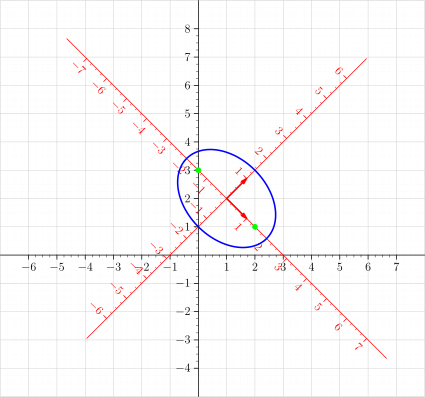

In [9]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

Canonica(-7,8,-5,9);
Elipse((1,2),(1,-1),4,2,x=8,y=7);

El canvi de coordenades de la referència $\mathcal{R}'$ a la referència canònica vé donat per
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} 1 \\ 2 \end{array}\right) 
  + \frac{1}{\sqrt{2}}\left(\begin{array}{rr}
   1 & 1 \\
  -1 & 1 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\,. 
$$

Per o obtenir l'equació de l'el·lipse en la referència canònica, hem d'aïllar $(x',y')$ en funció de $(x,y)$ a partir d'aquesta iqualtat i substituir-ho a l'equació reduïda de la el·lipse.

In [13]:
x1, y1 = var('x1 y1')
eq1 = x1^2/4 + y1^2/2 - 1 == 0
show(eq1)

1/4*x1^2 + 1/2*y1^2 - 1 == 0

In [15]:
x, y = var('x y')
X = vector([x,y])
C = 1/sqrt(2)*matrix([[1,1],[-1,1]])
x1, y1 = C.inverse() * (X - B)
show(x1)
show(y1)

1/2*sqrt(2)*(x - 1) - 1/2*sqrt(2)*(y - 2)

1/2*sqrt(2)*(x - 1) + 1/2*sqrt(2)*(y - 2)

In [17]:
eq = eq1.subs(x1=x1,y1=y1).expand()
## show(eq)
show(8*eq)

3*x^2 + 2*x*y + 3*y^2 - 10*x - 14*y + 11 == 0

L'equació de l'el·lipse en la referència canònica és $3x^2+2xy+3y^2-10x-14y+11 = 0$.

## Exercici 4
Es considera la paràbola que té per focus el punt $(-2,1)$ i per directriu la recta d'equació
$$x+2y-10=0 \,. $$
1. Determineu una referència principal i l'equació reduïda.
1. Calculeu la seva equació en la referència canònica.

Trobem en primer lloc la projecció ortogonal del focus sobre la recta directriu. La recta perpendicular a la directriu que passa pel focus té equació $2x-y+5=0$. Aleshores,

In [18]:
x, y = var('x y')
show(solve([x+2*y-10==0,2*x-y+5==0],[x,y]))

[[x == 0, y == 5]]

In [19]:
F = vector([-2,1])
F1 = vector([0,5])
V = (F+F1)/2
show(V)

(-1, 3)

El vèrtex de la paràbola és el punt $(-1,3)$ i les direccions dels eixos principals són $\vec u_1=(2,-1)$ (vector director de la recta directriu) i $\vec u_2=(1,2)$ (perpendicular a l'anterior).

El paràmetre de la paràbola és 

In [20]:
p = (F-F1).norm()
show(p)

2*sqrt(5)

La referència principal de la paràbola és
$$
  \mathcal{R}'=\left\{(-1,3),\frac{1}{\sqrt{5}}(2,-1),\frac{1}{\sqrt{5}}(1,2)\right\}
$$

L'equació reduïda d'una paràbola és de la forma
$$
  y'=\pm\frac{x'^2}{2p}
$$
i per determinar si el signe és positiu o negatiu, hem de veure si el vector $\overrightarrow{VF}$ té el mateix sentit o el contrari que el vector $\vec u_2$:

In [21]:
show(F-V)

(-1, -2)

Per tant, l'equació reduïda de la paràbola
$$
   y'=-\frac{x'^2}{4\sqrt{5}}
$$
En el gràfic següent podem veure representada la paràbola:

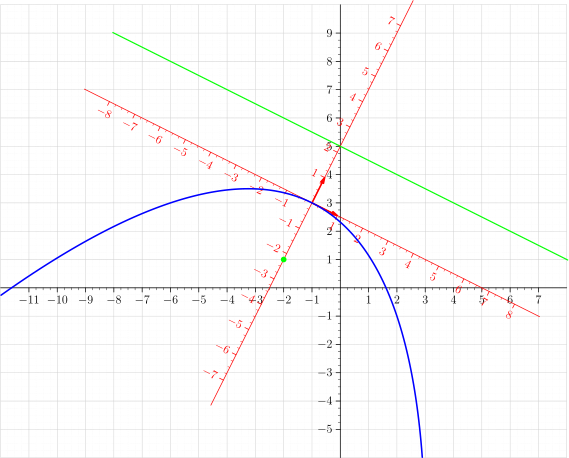

In [22]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

Canonica(-12,8,-6,10);
Parabola((-1,3),(-2,1),x=9,y=8);

Calculem l'equació de la paràbola en la referència canònica:

El canvi de coordenades de la referència $\mathcal{R}'$ a la referència canònica vé donat per
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} -1 \\ 3 \end{array}\right) 
  + \frac{1}{\sqrt{5}}\left(\begin{array}{rr}
   2 & 1 \\
  -1 & 2 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\,. 
$$

In [24]:
x1, y1 = var('x1 y1')
eq1 = y1+x1^2/(4*sqrt(5)) == 0
show(eq1)

1/20*sqrt(5)*x1^2 + y1 == 0

In [26]:
x , y = var('x y')
B = V
C = 1/sqrt(5)*matrix([[2,1],[-1,2]])
X = vector([x,y])
x1, y1 = C.inverse() * (X - B)
show(x1)
show(y1)

2/5*sqrt(5)*(x + 1) - 1/5*sqrt(5)*(y - 3)

1/5*sqrt(5)*(x + 1) + 2/5*sqrt(5)*(y - 3)

In [27]:
eq = eq1.subs(x1=x1,y1=y1).expand()
show(eq)

1/25*sqrt(5)*x^2 - 1/25*sqrt(5)*x*y + 1/100*sqrt(5)*y^2 + 2/5*sqrt(5)*x + 3/10*sqrt(5)*y - 3/4*sqrt(5) == 0

Com que tots els termes estan multiplicats per $\sqrt{5}$ i el denominador comú és 100, multipliquem l'equacio per $\dfrac{100}{\sqrt{5}}$:

In [28]:
eq = expand(100/sqrt(5)*eq)
show(eq)

4*x^2 - 4*x*y + y^2 + 40*x + 30*y - 75 == 0

L'equació de la paràbola en la referència canònica és $4x^2-4xy+y^2+40x+30y-75 = 0$.

## Exercici 5
Es considera la hipèrbola que té per focus els punts $(-1,2)$ i $(3,0)$ i semieix real $2$.
1. Determineu una referència principal i l'equació reduïda.
1. Calculeu la seva equació en la referència canònica.

En primer lloc, escrivim els focus i el semieix real:

In [29]:
F1 = vector([-1,2])
F2 = vector([3,0])
a = 2

El centre de la hipèrbola ñes el punt mitjà del segment que uneix els focus i la semidistància focal és la meitat de distància entre els focus. Aleshores, també podrem trobar el semieix imaginari.

In [30]:
B = (F1+F2)/2
show(B)

(1, 1)

La semidistància focal és

In [31]:
c = (F1-F2).norm()/2
show(c)

sqrt(5)

i el semieix imaginari

In [32]:
b = sqrt(c^2-a^2)
show(b)

1

L'equació reduïda de la hipèrbola és
$$
  \frac{x'^2}{4}-y'^2=1
$$
i les direccions dels eixos principals són

In [33]:
u1 = F2-B
show(u1)

(2, -1)

és a dir, $\vec u_1=(2,-1)$ i $\vec u_2=(1,2)$. La referència principal de la hipèrbola és
$$
  \mathcal{R}'=\left\{(1,1),\frac{1}{\sqrt{5}}(2,-1),\frac{1}{\sqrt{5}}(1,2)\right\}\,.
$$
En el gràfic següent podem veure representada la hipèrbola:

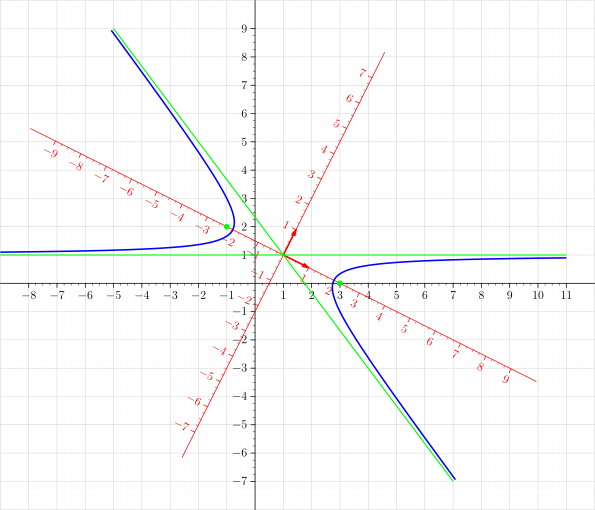

In [34]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

Canonica(-9,12,-8,10);
Hiperbola((1,1),(2,-1),4,1,x=10,y=8);

Calculem l'equació de la paràbola en la referència canònica:

El canvi de coordenades de la referència $\mathcal{R}'$ a la referència canònica vé donat per
$$
  \left(\begin{array}{c} x \\ y \end{array}\right) 
  = \left(\begin{array}{r} 1 \\ 1 \end{array}\right) 
  + \frac{1}{\sqrt{5}}\left(\begin{array}{rr}
   2 & 1 \\
  -1 & 2 \\
  \end{array}\right) 
  \left(\begin{array}{c} x' \\ y' \end{array}\right)\,. 
$$

In [35]:
x1, y1 = var('x1 y1')
eq1 = x1^2/4-y1^2-1 == 0
show(eq1)

1/4*x1^2 - y1^2 - 1 == 0

In [36]:
x , y = var('x y')
C = 1/sqrt(5)*matrix([[2,1],[-1,2]])
X = vector([x,y])
x1, y1 = C.inverse() * (X - B)
show(x1)
show(y1)

2/5*sqrt(5)*(x - 1) - 1/5*sqrt(5)*(y - 1)

1/5*sqrt(5)*(x - 1) + 2/5*sqrt(5)*(y - 1)

In [39]:
eq = eq1.subs(x1=x1,y1=y1).expand()
show(eq)

-x*y - 3/4*y^2 + x + 5/2*y - 11/4 == 0

Com que ens queda el denominador comú 4, podem multiplicar l'equació per 4 o per $-4$:

In [40]:
eq = -4*eq
show(eq)

4*x*y + 3*y^2 - 4*x - 10*y + 11 == 0

L'equació de la hipèrbola en la referència canònica és $4xy+3y^2-4x-10y+11=0$.

## Exercici 6
Trobeu les rectes que formen la cònica
$$
  2x^2-2y^2-3xy+4x-3y+2=0 \,.
$$

Es tracta de descomposar en factors el polinomi de segon grau:
$$
  2x^2-2y^2-3xy+4x-3y+2 = (Ax+By+C)(ax+by+c)\,,
$$
i això ho podem fer amb la funció *factor*.

In [41]:
x, y = var('x y')
eq = 2*x^2-2*y^2-3*x*y+4*x-3*y+2
show(factor(eq))

(2*x + y + 2)*(x - 2*y + 1)

Les dues rectes tenen equacions $2x+y+2=0$ i $x-2y+1=0$.

## Exercici 7
Determineu el centre i el radi de la circumferència d'equació
$$
  4x^2+4y^2-8x+4y-15=0 \,.
$$

Hem de completar quadrats en aquesta expressió:

In [3]:
x, y = var('x y')
x1, y1 = var('x1 y1')
eq = 4*x^2+4*y^2-8*x+4*y-15
t, r  = completa_quadrats(eq,[x,y],[x1,y1])
show(t)
show(r)

4*x1^2 + 4*y1^2 == 20

[x1 == x - 1, y1 == y + 1/2]

És a dir, l'equació $4x^2+4y^2-8x+4y-15=0$ es pot escriure com a 
$$
  4(x-1)^2 + 4\left(y+\frac{1}{2}\right)^2 = 20
  \qquad\text{o, dividint per 4}\qquad
  (x-1)^2 + \left(y+\frac{1}{2}\right)^2 = 5\,.
$$
Es tracta, doncs, de la circumferència de centre $C=\left(1,-\dfrac{1}{2}\right)$ i radi $r=\sqrt{5}$.

## Exercici 8
Es considera la cònica d'equació
$$
   3x^2+2xy+3y^2+16x+16=0\,. 
$$
1. Classifiqueu-la.
2. Determineu els elements geomètrics, els paràmetres i la definició mètrica.
3. Representeu-la gràficament.

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rr}
   3 & 1 \\
   1 & 3
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} 8 \\ 0 \end{array}\right)\qquad\text{i}\qquad
  f=16\,.
$$

In [4]:
Q = matrix([[3,1],[1,3]])
L = vector([8,0])
f = 16

Per calcular el seu centre, si en té, hem de resoldre el sistema d'equacions $QX=-L$, és a dir,
$$
  \left(\begin{array}{rr}
   3 & 1 \\
   1 & 3
  \end{array}\right)
  \left(\begin{array}{r} x \\ y \end{array}\right)
  = \left(\begin{array}{r} -8 \\ 0 \end{array}\right)\,,
$$
i la funció `centre_conica_quadrica` ja ho fa.

In [5]:
B = centre_conica_quadrica(Q,L)
show(B)

(-3, 1)

A continuació, necessitem els valors i vectors propis de la matriu $Q$. Recordem del capítol anterior que s'ha de calcular el polinomi característic, els valors propis i, finalment, el vectors propis. La funció *diagonalitza_matriu_simetrica* ja ho fa tot.

In [6]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(2, 4)

Quan els valors propis tenen el mateix signe, és habitual posar en primer lloc el més petit en valor absolut. Aleshores els canviem d'ordre

In [7]:
show(v)

((1, -1), (1, 1))

Els valors propis de $Q$ són $\lambda_1=2$ i $\lambda_2=4$ amb vectors propis $\vec u_1=(1,-1)$ i $\vec u_2=(1,1)$, respectivament.

Ara ja podem calcular l'equació reduïda de la cònica:

In [8]:
eq = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,B)
show(eq)

1/4*x1^2 + 1/2*y1^2 == 1

La cònica és una el·lipse amb referència principal i equació reduïda
$$
  \mathcal{R}'=\left\{(-3,1)\,;\frac{1}{\sqrt{2}}(1,-1),\frac{1}{\sqrt{2}}(1,1)\right\}\qquad\text{i}\qquad
  \frac{x'^2}{4}+\frac{y'^2}{2}=1\,.
$$
El semieix major és $a=2$ i el semieix menor $b=\sqrt{2}$.

En el següent gràfic podem veure l'el·lipse

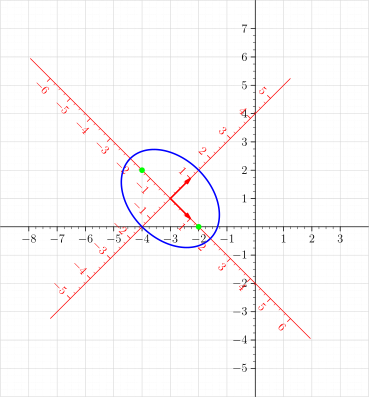

In [9]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

Canonica(-9,4,-6,8);
Elipse((-3,1),(1,-1),4,2,x=7,y=6);

La semidistància focal és

In [10]:
a = 2
b = sqrt(2)
c = sqrt(a^2-b^2)
show(c)

sqrt(2)

Les coordenades dels focus de l'el·lipse en la referència principal són $(c,0)_{\mathcal{R}'}$ i $(-c,0)_{\mathcal{R}'}$. Calculem ara les seves coordenades en la referència canònica:

In [11]:
v = normalitza(v)
ref = [B,v]
show(coordenades_en_canonica(ref,[(c,0),(-c,0)]))

[(-2, 0), (-4, 2)]

Els vèrtexs de l'el·lipse són els punts que en la referència principal tenen coordenades $(a,0)_{\mathcal{R}'}$, $(-a,0)_{\mathcal{R}'}$, $(0,b)_{\mathcal{R}'}$ i $(0,-b)_{\mathcal{R}'}$. Calculem ara les seves coordenades en la referència canònica:

In [12]:
show(coordenades_en_canonica(ref,[(a,0),(-a,0),(0,b),(0,-b)]))

[(sqrt(2) - 3, -sqrt(2) + 1), (-sqrt(2) - 3, sqrt(2) + 1), (-2, 2), (-4, 0)]

Els vèrtexs que estan sobre l'eix de les $x'$ són $\big(-3+\sqrt{2},1-\sqrt{2}\big)$ i $\big(-3-\sqrt{2},1+\sqrt{2}\big)$ i els vèrtexs que estan sobre l'eix de les $y'$ són $(-2,2)$ i $(-4,0)$.

**Definició mètrica**: el·lipse formada pels punts del pla tals que la suma de les seves distàncies als punts $(-4,2)$ i $(-2,0)$ és $4$.

## Exercici 9
Es considera la cònica d'equació
$$4x^2-4xy+y^2+32x+34y-11=0 \,. $$
1. Classifiqueu-la.
2. Determineu els elements geomètrics, els paràmetres i la definició mètrica.
3. Representeu-la gràficament.

Essencialment, hem de seguir els mateixos passos que a l'exercici anterior.

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rr}
    4 & -2 \\
   -2 &  1
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} 16 \\ 17 \end{array}\right)\qquad\text{i}\qquad
  f=-11\,.
$$

In [13]:
Q = matrix([[4,-2],[-2,1]])
L = vector([16,17])
f = -11

Centre de la cònica:

In [14]:
B = centre_conica_quadrica(Q,L)
show(B)

[]

La cònica no té centre, per tant, és una **paràbola**. En aquest cas, haurem de calcular el seu vèrtex.

Valors i vectors propis de la matriu $Q$:

In [15]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(5, 0)

In [16]:
show(v)

((2, -1), (1, 2))

Els vectors propis de $Q$ són $\lambda_1=5$ i $\lambda_2=0$ amb vectors propis $\vec u_1=(2,-1)$ i $\vec u_2=(1,2)$, respectivament.

Calculem ara l'equació reduïda, el paràmetre i el vèrtex de la paràbola, utilitzant les funcions *equacio_reduida_parabola*, *parametre_parabola* i *vertex_parabola*.

In [17]:
show(equacio_reduida_parabola(L,l,v))

y1 == -1/20*sqrt(5)*x1^2

In [18]:
p = parametre_parabola(L,l,v)
show(p)

2*sqrt(5)

In [19]:
V = vertex_parabola(Q,L,f,l,v)
show(V)

(-1, 1)

La referència principal i l'equació reduïda de la paràbola és són
$$
  \mathcal{R}'=\left\{(-1,1)\,;\frac{1}{\sqrt{5}}(2,-1),\frac{1}{\sqrt{5}}(1,2)\right\}\qquad\text{i}\qquad
  y'=-\frac{x'^2}{4\sqrt{5}}\,.
$$

El focus de la paràbola és el punt $\left(0,-\sqrt{5}\right)_{\mathcal{R}'}$. Les seves coordenades en la referència canònica són

In [20]:
v = normalitza(v)
ref = [V,v]
F1 = vector([0,-sqrt(5)])
F = coordenades_en_canonica(ref,F1)
show(F)

(-2, -1)

El focus és el punt $F=(-2,-1)$. En el gràfic següent podem veure representada la paràbola:

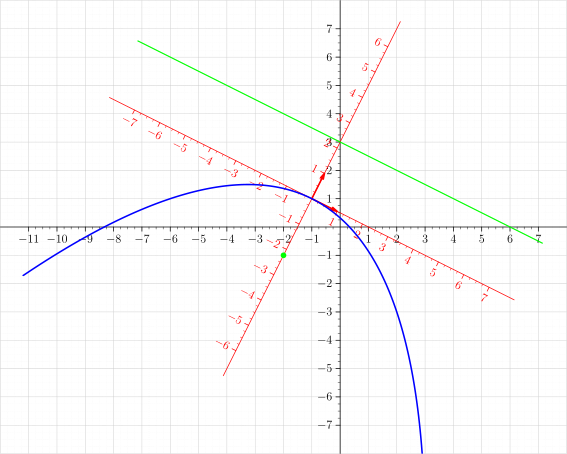

In [21]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1cm);

Canonica(-12,8,-8,8);
Parabola((-1,1),(-2,-1),x=8,y=7);

Finalment, la recta directriu és la recta que té vector director $(2,-1)$ i passa pel punt $F_2$, on

In [22]:
F2 = vector([0,sqrt(5)])
F = coordenades_en_canonica(ref,F2)
show(F)

(0, 3)

és a dir, la seva equació és $x+2y=6$.

**Definició mètrica**: paràbola formada pels punts que equidisten del focus $F=(-2,-1)$ i de la recta directriu $x+2y=6$.

## Exercici 10
Es considera la cònica no degenerada d'equació
$$
  3x^2-4xy-8x+8y=0 \,. 
$$
1. Classifiqueu-la.
2. Determineu els elements geomètrics, els paràmetres i la definició mètrica.

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rr}
    3 & -2 \\
   -2 &  0
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} -4 \\ 4 \end{array}\right)\qquad\text{i}\qquad
  f=0\,.
$$

In [23]:
Q = matrix([[3,-2],[-2,0]])
L = vector([-4,4])
f = 0

Centre de la cònica:

In [24]:
B = centre_conica_quadrica(Q,L)
show(B)

(2, 1)

Valors i vectors propis de la matriu $Q$:

In [25]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(4, -1)

In [26]:
show(v)

((2, -1), (1, 2))

Els valors propis de $Q$ són $\lambda_1=4$ i $\lambda_2=-1$ amb vectors propis $\vec u_1=(2,-1)$ i $\vec u_2=(1,2)$, respectivament.

In [27]:
eq = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,B)
show(eq)

x1^2 - 1/4*y1^2 == 1

La cònica és una hipèrbola amb referència principal i equació reduïda
$$
  \mathcal{R}'=\left\{(2,1)\,;\frac{1}{\sqrt{5}}(2,-1),\frac{1}{\sqrt{5}}(1,2)\right\}\qquad\text{i}\qquad
  x'^2-\frac{y'^2}{4}=1\,.
$$
El semieix real és $a=1$ i el semieix imaginari $b=2$. La semidistància focal és 

In [28]:
a = 1
b = 2
c = sqrt(a^2+b^2)
show(c)

sqrt(5)

En el gràfic següent podem veure la hipèrbola

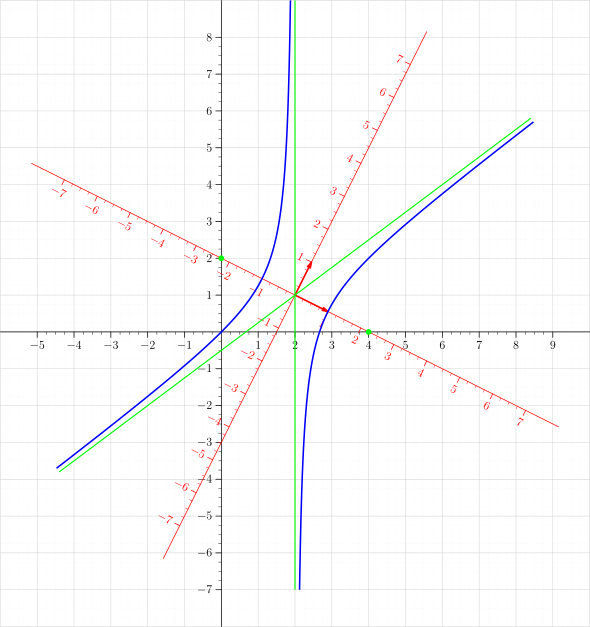

In [29]:
%%asy --fmt svg
import geometry;
import coordenades;
import graph;

unitsize(1.3cm);

Canonica(-6,10,-8,9);
Hiperbola((2,1),(2,-1),1,4,x=8,y=8);

Els focus són els punts de coordenades $\left(\sqrt{5},0\right)_{\mathcal{R}'}$ i $\left(-\sqrt{5},0\right)_{\mathcal{R}'}$, mente que és vèrtexs tenen coordenades
$(1,0)_{\mathcal{R}'}$ i $(-1,0)_{\mathcal{R}'}$. Les seves coordenades en la referència canònica són

In [30]:
B1 = normalitza(v)
ref = [B,B1]
show(coordenades_en_canonica(ref,[(c,0),(-c,0),(a,0),(-a,0)]))

[(4, 0),
 (0, 2),
 (2/5*sqrt(5) + 2, -1/5*sqrt(5) + 1),
 (-2/5*sqrt(5) + 2, 1/5*sqrt(5) + 1)]

Les components dels vectors directors de les asímtotes (en la base $\mathcal{B}'=\{(2,-1),(1,2)\}$ són $(a,\pm b)_{\mathcal{B}'}$, és a dir, $(1,2)_{\mathcal{B}'}$ i $(1,-2)_{\mathcal{B}'}$. Les components en la base canònica d'aquest vectors són

In [31]:
B1 = [vector([2,-1]),vector([1,2])]
w1 = vector([a,b])
w2 = vector([a,-b])
w = components_en_canonica(B1,[w1,w2])
show(w)

[(4, 3), (0, -5)]

Per tant, les equacions de les asímptotes de la hipèrbola (recordem que passen pel centre $(2,1)$) són $3x-4y=2$ i $x=2$.

**Definició mètrica**: hipèbola formada pels punts tals que el valor absolut de la diferència de les seves distàncies a $(4,0)$ i $(0,2)$ és $2$.

## Exercici 11
Donada la quàdrica d'equació
$$
 7 x^2 + 7 y^2 - 5 z^2 - 34 x y - 10 x z - 10 y z + 136 x - 56 y + 40 z -8 = 0
$$
en la refrència canònica, trobeu la seva equació en la referència $\mathcal{R}'=\left\{(-2,2,4);\,\frac{1}{\sqrt{2}}(1,-1,0),\frac{1}{\sqrt{3}}(1,1,1),\frac{1}{\sqrt{6}}(-1,-1,2)\right\}$.

En aquest cas tenim que les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
     7 & -17 & -5 \\
   -17 &   7 & -5 \\
    -5 &  -5 & -5
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} 68 \\ -28 \\ 20 \end{array}\right)\qquad\text{i}\qquad
  f=-8\,.
$$
i hem d'aplicar el canvi de coordenades
$$
  \left(\begin{array}{c} x\\ y\\ z \end{array}\right)
  = \left(\begin{array}{r} -2\\ 2\\ 4 \end{array}\right) 
  +\frac{1}{\sqrt{6}}\left(\begin{array}{ccr} 
   \sqrt{3} & \sqrt{2} & -1 \\ 
  -\sqrt{3} & \sqrt{2} & -1 \\ 
   0        & \sqrt{2} &  2
   \end{array}\right) 
  \left(\begin{array}{c} x'\\ y'\\ z' \end{array}\right)\,,
$$

In [33]:
x, y, z = var('x y z')
eq = 7*x^2 + 7*y^2 - 5*z^2 - 34*x*y - 10*x*z - 10*y*z + 136*x - 56*y + 40*z - 8 == 0
show(eq)

7*x^2 - 34*x*y + 7*y^2 - 10*x*z - 10*y*z - 5*z^2 + 136*x - 56*y + 40*z - 8 == 0

Canvi de coordenades:

In [42]:
v1 = 1/sqrt(2)*vector([1,-1,0])
v2 = 1/sqrt(3)*vector([1,1,1])
v3 = 1/sqrt(6)*vector([-1,-1,2])
C = matrix([v1,v2,v3]).T
B = vector([-2,2,4])
show(C)

[ 1/2*sqrt(2)  1/3*sqrt(3) -1/6*sqrt(6)]
[-1/2*sqrt(2)  1/3*sqrt(3) -1/6*sqrt(6)]
[           0  1/3*sqrt(3)  1/3*sqrt(6)]

In [38]:
x1, y1, z1 = var('x1 y1 z1')
X1 = vector([x1,y1,z1])
x, y, z = B + C * X1
show(x)
show(y)
show(z)

1/2*sqrt(2)*x1 + 1/3*sqrt(3)*y1 - 1/6*sqrt(6)*z1 - 2

-1/2*sqrt(2)*x1 + 1/3*sqrt(3)*y1 - 1/6*sqrt(6)*z1 + 2

1/3*sqrt(3)*y1 + 1/3*sqrt(6)*z1 + 4

In [40]:
eq1 = eq.subs(x=x,y=y,z=z).expand()
show(1/120*eq1)

1/5*x1^2 - 1/8*y1^2 - 1 == 0

L'equació de la quàdrica en la referència $\mathcal{R}'$ és
$$
  \frac{x'^2}{5}-\frac{y'^2}{8}=1
$$
i es tracta d'un cilindre hiperbòlic.

## Exercici 12
Calculeu l'equació en la referència canònica
de la quàdrica  que en la referència euclidiana $\mathcal{R}'=\left\{(3,-1,2);\,\frac13(2,2,-1),\frac13(2,-1,2),\frac13(-1,2,2)\right\}$ té equació
$$
  x'^2+y'^2-2z'^2=0\,. 
$$

In [41]:
x1, y1, z1 = var('x1 y1 z1')
eq1 = x1^2 + y1^2 - 2*z1^2 == 0
show(eq1)

x1^2 + y1^2 - 2*z1^2 == 0

Canvi de coordenades

In [43]:
B = vector([3,-1,2])
v1 = 1/3*vector([2,2,-1])
v2 = 1/3*vector([2,-1,2])
v3 = 1/3*vector([-1,2,2])
C = matrix([v1,v2,v3]).T
show(C)

[ 2/3  2/3 -1/3]
[ 2/3 -1/3  2/3]
[-1/3  2/3  2/3]

L'equació de la quàdrica en la referència canònica és

In [45]:
x, y, z = var('x y z')
X = vector([x,y,z])
x1, y1, z1 = C.inverse() * (X - B)
show(x1)
show(y1)
show(z1)

2/3*x + 2/3*y - 1/3*z - 2/3

2/3*x - 1/3*y + 2/3*z - 11/3

-1/3*x + 2/3*y + 2/3*z + 1/3

In [48]:
eq = eq1.subs(x1=x1,y1=y1,z1=z1).expand()
show(3*eq)

2*x^2 + 4*x*y - y^2 + 4*x*z - 8*y*z - z^2 - 16*x + 2*y - 16*z + 41 == 0

és a dir,
$$
  2x^2-y^2-z^2+4xy+4xz-8yz-16x+2y-16z+41=0\,.
$$

## Exercici 13
Trobeu l'equació de la quàdrica formada pel parell de plans
$$
  x-2y+3z-1=0 \qquad \text{i} \qquad y-2z+2=0 \,.
$$

Es tracta d'un parell de plans secants i la seva equació és

In [49]:
x, y, z = var('x y z')
eq = expand((x-2*y+3*z-1)*(y-2*z+2))
show(eq == 0)

x*y - 2*y^2 - 2*x*z + 7*y*z - 6*z^2 + 2*x - 5*y + 8*z - 2 == 0

i, si canviem el signe, ens queda l'equació
$$
  2y^2+6z^2-xy+2xz-7yz-2x+5y-8z+2=0\,.
$$

## Exercici 14
Determineu les equacions dels dos plans que formen la quàdrica d'equació
$$
  x^2+3y^2+15z^2+4xy-8xz-14yz=0 \,.
$$

Només cal que descomposem en factors el terme $x^2+3y^2+15z^2+4xy-8xz-14yz$:

In [50]:
x, y, z = var('x y z')
show(factor(x^2+3*y^2+15*z^2+4*x*y-8*x*z-14*y*z))

(x + 3*y - 5*z)*(x + y - 3*z)

Les equacions dels dos plans són $x+3y-5z=0$ i $x+y-3z=0$ i es tracta de dos plans secants.

## Exercici 15
Calculeu l'equació de l'esfera de centre $(1,-2,1)$ i radi $3$.

Recordem que l'equació de l'esfera de centre $(x_0,y_0,z_0)$ i radi $r$ és
$$
  (x-x_0)^2 + (y-y_0)^2 + (z-z_0)^2= r^2\,.
$$

In [51]:
x, y, z = var('x y z')
eq = expand((x-1)^2+(y+2)^2+(z-1)^2 - 3^2) == 0
show(eq)

x^2 + y^2 + z^2 - 2*x + 4*y - 2*z - 3 == 0

L'equació de l'esfera és $x^2 + y^2 + z^2 - 2x + 4y - 2z - 3 = 0$.

## Exercici 16
Determineu el centre i el radi de l'esfera d'equació
$$
  x^2+y^2+z^2-4x+2y-6z+10=0 \,.
$$

Per determinar el centre i el radi, hem de completar quadrats:

In [52]:
x, y, z = var('x y z')
x1, y1, z1 = var('x1 y1 z1')
eq = x^2 + y^2 + z^2 - 4*x + 2*y - 6*z + 10
show(completa_quadrats(eq,[x,y,z],[x1,y1,z1]))

(x1^2 + y1^2 + z1^2 == 4, [x1 == x - 2, y1 == y + 1, z1 == z - 3])

És a dir, l'equació de l'esfera es pot escriure com a
$$
  (x-2)^2 + (y+1)^2 + (z-3)^3 = 4\,.
$$

Es tracta de la circumferència de centre $C=(2,-1,3)$ i radi $r=2$.

## Exercici 17
Classifiqueu la quàdrica d'equació
$$
  4x^2+4y^2+z^2+2xy-4xz+4yz+2x-2y+4z-6=0 \,.
$$

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
    4 & 1 & -2 \\
    1 & 4 &  2 \\
   -2 & 2 &  1
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} 1 \\ -1 \\ 2 \end{array}\right)\qquad\text{i}\qquad
  f=-6\,.
$$

In [53]:
Q = matrix([[4,1,-2],[1,4,2],[-2,2,1]])
L = vector([1,-1,2])
f = -6

Centre de la quàdrica: solució de $QX=-L$.

In [54]:
C = centre_conica_quadrica(Q,L)
show(C)

(1, -1, 2)

Valors i vectors propis de la matriu $Q$:

In [55]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(5, 5, -1)

In [56]:
show(v)

((2, 0, -1), (1, 5, 2), (1, -1, 2))

Com que és una quàdrica amb centre, la seva equació reduïda és

In [57]:
eq = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,C)
show(eq)

x1^2 + y1^2 - 1/5*z1^2 == 0

Per tant, la quàdrica és un **con de revolució**, la seva referència principal és
$$
   \mathcal{R}'=\left\{(1,-1,2);\,\frac{1}{\sqrt{5}}(2,0,-1),\frac{1}{\sqrt{30}}(1,5,2),\frac{1}{\sqrt{6}}(1,-1,2)\right\}
$$
i la seva equació reduïda
$$
  x'^2+y'^2-\frac{z'^2}{5}=0\,.
$$

## Exercici 18
Classifiqueu la quàdrica d'equació
$$
  23 x^2 + 23 y^2 + 8 z^2 - 34 x y + 4 x z + 4 y z + 84 x - 76 y - 24 z + 68 = 0\,.
$$

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
    23 & -17 & 2 \\
   -17 &  23 & 2 \\
     2 &   2 & 8
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} 42 \\ -38 \\ -12 \end{array}\right)\qquad\text{i}\qquad
  f=68\,.
$$

In [58]:
Q = matrix([[23,-17,2],[-17,23,2],[2,2,8]])
L = vector([42,-38,-12])
f = 68

Centre de la quàdrica:

In [59]:
B = centre_conica_quadrica(Q,L)
show(B)

(-2, 0, 2)

Valors i vectors propis de la matriu $Q$:

In [60]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(4, 10, 40)

In [61]:
show(v)

((1, 1, -1), (1, 1, 2), (1, -1, 0))

Equació reduïda:

In [62]:
eq = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,B)
show(eq)

1/10*x1^2 + 1/4*y1^2 + z1^2 == 1

La quàdrica és un **el·lipsoide real**, la seva referència principal és
$$
  \mathcal{R}'=\left\{(-2,0,2);\,\frac{1}{\sqrt{3}}(1,1,-1),\frac{1}{\sqrt{6}}(1,1,2),\frac{1}{\sqrt{2}}(1,-1,0)\right\}
$$
i l'equació reduïda
$$
  \frac{x'^2}{10}+\frac{y'^2}{4}+z'^2=1\,.
$$

## Exercici 19
Classifiqueu la quàdrica d'equació
$$
  37 x^2 + 7 y^2 + 7 z^2 + 34 x y + 34 x z + 26 y z - 154 x - 86 y - 38 z + 13 = 0\,.
$$

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
    37 & 17 & 17 \\
    17 &  7 & 13 \\
    17 & 13 &  7
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} -77 \\ -43 \\ -19 \end{array}\right)\qquad\text{i}\qquad
  f=13\,.
$$

In [63]:
Q = matrix([[37,17,17],[17,7,13],[17,13,7]])
L = vector([-77,-43,-19])
f = 13

Centre de la quàdrica:

In [64]:
C = centre_conica_quadrica(Q,L)
show(C)

(3, -3, 1)

Valors i vectors propis de $Q$:

In [65]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(3, 54, -6)

In [66]:
show(v)

((1, -1, -1), (2, 1, 1), (0, -1, 1))

Equació reduïda amb aquests valors i vectors propis:

In [67]:
eq = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,C)
show(eq)

1/36*x1^2 + 1/2*y1^2 - 1/18*z1^2 == 1

In [68]:
eq = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,C)
show(eq)

1/36*x1^2 + 1/2*y1^2 - 1/18*z1^2 == 1

La quàdrica és un **hiperboloide d'una fulla**, la seva referència principal amb orientació positiva és
$$
  \mathcal{R}'=\left\{(3,-3,1);\,\frac{1}{\sqrt{3}}(1,-1,-1),\frac{1}{\sqrt{6}}(2,1,1),\frac{1}{\sqrt{2}}(0,-1,1)\right\}
$$
i l'equació reduïda
$$
  \frac{x'^2}{36}+\frac{y'^2}{2}-\frac{z'^2}{18}=1\,.
$$

## Exercici 20
Classifiqueu la quàdrica d'equació
$$
  -11x^2 - 11y^2 + 7z^2 + 32xy - 4xz - 4yz - 68x + 40y + 22z + 79 = 0\,.
$$

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
   -11 &  16 &  -2 \\
    16 & -11 &  -2 \\
    -2 &  -2 &   7
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} -34 \\ 20 \\ 11 \end{array}\right)\qquad\text{i}\qquad
  f=79\,.
$$

In [69]:
Q = matrix([[-11,16,-2],[16,-11,-2],[-2,-2,7]])
L = vector([-34,20,11])
f = 79

Centre de la quàdrica:

In [70]:
C = centre_conica_quadrica(Q,L)
show(C)

(0, 2, -1)

Valors i vectors propis de la matriu $Q$:

In [71]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(3, 9, -27)

In [72]:
show(v)

((1, 1, 1), (1, 1, -2), (-1, 1, 0))

In [73]:
eq = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,C)
show(-eq)

1/36*x1^2 + 1/12*y1^2 - 1/4*z1^2 == -1

Es tracta d'un **hiperboloide de dues fulles**. La referència principal és
$$
  \mathcal{R}'=\left\{(0,2,-1);\,\frac{1}{\sqrt{3}}(1,1,1),\frac{1}{\sqrt{6}}(1,1,-2),\frac{1}{\sqrt{2}}(-1,1,0)\right\}\,,
$$
i l'equació reduïda
$$
  \frac{x'^2}{36}+\frac{y'^2}{12}-\frac{z'^2}{4}=-1\,.
$$

## Exercici 21
Classifiqueu la quàdrica d'equació
$$
  11 x^2 - 5 y^2 + z^2 - 26 x y - 38 x z - 6 y z - 112 x + 28 z -14  = 0\,.
$$

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
    11 & -13 & -19 \\
   -13 &  -5 &  -3 \\
   -19 &  -3 &   1
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} -56 \\ 0 \\ 14 \end{array}\right)\qquad\text{i}\qquad
  f=-14\,.
$$

In [74]:
Q = matrix([[11,-13,-19],[-13,-5,-3],[-19,-3,1]])
L = vector([-56,0,14])
f = -14

Centre de la quàdrica:

In [75]:
C = centre_conica_quadrica(Q,L)
show(C)

(5/4, -13/4, 0)

Valors i vectors propis de la matriu $Q$:

In [76]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(28, -21, 0)

In [77]:
show(v)

((3, -1, -2), (1, 1, 1), (1, -5, 4))

**Observació**: com que hem trobat un centre i la matriu $Q$ té el valor propi $\lambda=0$, sabem que el sistema d'equacions $QX=-L$ és compatible indeterminat.
Trobem la solució general:

In [78]:
x, y, z = var('x y z')
X = vector([x,y,z])
QX = Q * X
eqs = [QX[i] == -L[i] for i in range(3)]
show(eqs)

[11*x - 13*y - 19*z == 56, -13*x - 5*y - 3*z == 0, -19*x - 3*y + z == -14]

In [79]:
sol = solve(eqs,[y,z])
show(sol)

[[y == -5*x + 3, z == 4*x - 5]]

Aleshores, el punt $C=(0,3,-5)$ també és un centre de la quàdrica.

Equació reduïda

In [80]:
eq = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,C)
show(eq)

1/3*x1^2 - 1/4*y1^2 == 1

Així doncs, la referència principal de la quàdrica és
$$
  \mathcal{R}'=\left\{(0,3,-5);\,\frac{1}{\sqrt{14}}(3,-1,-2),\frac{1}{\sqrt{3}}(1,1,1),\frac{1}{\sqrt{42}}(1,-5,4)\right\}\,,
$$
l'equació reduïda
$$
  \frac{x'^2}{3}-\frac{y'^2}{4}=1
$$
i es tracta d'un **cilindre hiperbòlic**.

## Exercici 22
Classifiqueu la quàdrica d'equació
$$
  5 x^{2} + 2 y^{2} + 2 z^{2} - 2 x y - 2 x z + 4 y z + 26 x + 2 y + 2 z + 11 = 0\,.
$$

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
    5 & -1 & -1 \\
   -1 &  2 &  2 \\
   -1 &  2 &  2
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} 13 \\ 1 \\ 1 \end{array}\right)\qquad\text{i}\qquad
  f=11\,.
$$

In [81]:
Q = matrix([[5,-1,-1],[-1,2,2],[-1,2,2]])
L = vector([13,1,1])
f = 11

Centre de la quàdrica:

In [82]:
C = centre_conica_quadrica(Q,L)
show(C)

(-3, -2, 0)

Valors i vectors propis de la matriu $Q$:

In [83]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(3, 6, 0)

In [84]:
show(v)

((1, 1, 1), (2, -1, -1), (0, 1, -1))

L'equacio reduïda de la quàdrica és

In [85]:
eq = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,C)
show(eq)

1/10*x1^2 + 1/5*y1^2 == 1

Es tracta d'un **cilindre el·líptic**. La referència principal és
$$
  \mathcal{R}'=\left\{(-3,-2,0);\,\frac{1}{\sqrt{3}}(1,1,1),\frac{1}{\sqrt{6}}(2,-1,-1),\frac{1}{\sqrt{2}}(0,1,-1)\right\}\,,
$$
i l'equació reduïda
$$
  \frac{x'^2}{10}+\frac{y'^2}{5}=1\,.
$$

## Exercici 23
Classifiqueu la quàdrica d'equació
$$
  9x^2+2y^2-4z^2-12xy-12xz-2x+24y+14z-5=0 \,.
$$

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
    9 & -6 & -6 \\
   -6 &  2 &  0 \\
   -6 &  0 & -4
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} -1 \\ 12 \\ 7 \end{array}\right)\qquad\text{i}\qquad
  f=-5\,.
$$

In [86]:
Q = matrix([[9,-6,-6],[-6,2,0],[-6,0,-4]])
L = vector([-1,12,7])
f = -5

Centre de la quàdrica:

In [87]:
B = centre_conica_quadrica(Q,L)
show(B)

[]

Es tracta d'una quàdrica sense centre. Com que la matriu $Q$ té rang 2, és un paraboloide el·líptic o hiperbòlic.

Valors i vectors propis de la matriu $Q$:

In [88]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(14, -7, 0)

In [89]:
show(v)

((6, -3, -2), (3, 2, 6), (-2, -6, 3))

Com que $Q$ té un valor propi positiu i un de negatiu, la quàdrica és un **paraboloide hiperbòlic**.

Càlcul del vèrtex del paraboloide: 

In [90]:
V = vertex_paraboloide_cilindre_parabolic(Q,L,f,l,v)
show(V)

(1, 0, 1)

Per tant, la referència principal (hem canviat de signe el primer vector propi per tal de tenir una base amb orientació positiva) del paraboloide hiperbòlic és
$$
  \mathcal{R}'=\left\{(1,0,1);\,\frac{1}{7}(6,-3,-2),\frac{1}{7}(3,2,6),\frac{1}{7}(-2,-6,3)\right\}\,.
$$

i la seva equació reduïda és

In [91]:
show(equacio_reduida_quadrica_sense_centre(L,l,v))

z1 == x1^2 - 1/2*y1^2

és a dir,
$$
  z'=x'^2-\frac{y'^2}{2}\,.
$$

## Exercici 24
Classifiqueu la quàdrica d'equació
$$
  2x^{2} + 5y^{2} + 2z^{2} + 2x y  - 4x z - 2y z  - 4x - 2y - 32z + 29 = 0\,.
$$

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
     2 &  1 & -2 \\
     1 &  5 & -1 \\
    -2 & -1 & 2
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} -2 \\ -1 \\ -16 \end{array}\right)\qquad\text{i}\qquad
  f=29\,.
$$

In [98]:
Q = matrix([[2,1,-2],[1,5,-1],[-2,-1,2]])
L = vector([-2,-1,-16])
f = 29

Centre de la quàdrica:

In [99]:
B = centre_conica_quadrica(Q,L)
show(B)

[]

Es tracta d'una quàdrica sense centre. Com que la matriu $Q$ té rang 2, és un paraboloide el·líptic o hiperbòlic.

Valors i vectors propis de la matriu $Q$:

In [100]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(3, 6, 0)

Com que els dos valors propis no nuls de $Q$ són positius, la quàdrica és un paraboloide el·líptic.

In [101]:
show(v)

((1, -1, -1), (1, 2, -1), (1, 0, 1))

Vèrtex del paraboloide:

In [102]:
V = vertex_paraboloide_cilindre_parabolic(Q,L,f,l,v)
show(V)

(-2, 1, 2)

Equació reduïda:

In [103]:
eq = equacio_reduida_quadrica_sense_centre(L,l,v)
show(eq)

z1 == 1/12*sqrt(2)*x1^2 + 1/6*sqrt(2)*y1^2

La quàdrica és un **paraboloide el·líptic**, la seva referència principal amb orientació positiva és
$$
  \mathcal{R}'=\left\{(-2,1,2);\,\frac{1}{\sqrt{3}}(1,-1,-1),\frac{1}{\sqrt{6}}(1,2,-1),\frac{1}{\sqrt{2}}(1,0,1)\right\}
$$
i l'equació reduïda
$$
  z'=\frac{x'^2}{6\sqrt{2}}+\frac{y'^2}{3\sqrt{2}}\,.
$$

## Exercici 25
Classifiqueu la quàdrica d'equació
$$
  x^2+y^2+4z^2+2xy+4xz+4yz-48x-24y+84=0 \,.
$$

Les matrius de la part quadràtica i lineal de la cònica i el terme independent són:
$$
  Q=\left(\begin{array}{rrr}
    1 & 1 & 2 \\
    1 & 1 & 2 \\
    2 & 2 & 4
  \end{array}\right)\,,\qquad
  L = \left(\begin{array}{r} -24 \\ -12 \\ 0 \end{array}\right)\qquad\text{i}\qquad
  f=84\,.
$$

In [104]:
Q = matrix([[1,1,2],[1,1,2],[2,2,4]])
L = vector([-24,-12,0])
f = 84

Centre de la quàdrica:

In [105]:
B = centre_conica_quadrica(Q,L)
show(B)

[]

Com que la quàdrica no té centre i la matriu $Q$ té rang 1, podem assegurar que es tracta d'un **cilindre parabòlic**.

Valors i vectors propis de la matriu $Q$:

In [106]:
l, v = diagonalitza_matriu_simetrica(Q)
show(l)

(6, 0, 0)

In [107]:
show(v)

((1, 1, 2), (2, 0, -1), (-1, 5, -2))

**Milt important**: Aquests no són necessàriament els vectors que hem d'escollir per a la referència principal. La referència principal estarà formada pels vectors

In [108]:
v1 = simplifica_vector(v[0])
v2 = simplifica_vector(v1.cross_product(L))
v3 = simplifica_vector(v1.cross_product(v2))

**No ho oblideu**

In [ ]:
v = [v1,v2,v3]
show(v)

Vèrtex del cilindre parabòlic. N'hi ha infinits. 

In [109]:
V = vertex_paraboloide_cilindre_parabolic(Q,L,f,l,v)
show(V)

(r1, -2*r1 + 5, 1/2*r1 + 1/2)

D'entre tots els punts de la recta de vèrtexs del cilindre parabòlic, n'escollim un com a origen de la referència principal. Si donem al paràmetre el valor $r_1=1$, tindrem el punt $V=(1,3,1)$.

Aleshores, un punt de la recta de vèrtexs del cilindre parabòlic és el punt $V=(1,3,1)$, la referència principal (recordem que no és única) és
$$
  \mathcal{R}'=\left\{(1,3,1);\,\frac{1}{\sqrt{6}}(1,1,2),\frac{1}{\sqrt{21}}(2,-4,1),\frac{1}{\sqrt{14}}(3,1,-2)\right\}
$$

i l'equació reduïda

In [110]:
eq = equacio_reduida_quadrica_sense_centre(L,l,v)
show(eq)

z1 == 1/12*sqrt(30)*x1^2

és a dir,
$$
  z'=\frac{x'^2}{2\sqrt{14}}\,.
$$

## Exercici 26

Considerem la quàdrica d'equació
$$
 2 x^{2} + 9 y^{2} - 7 z^{2} + 4 x y + 12 x z + 2 y z + 52 x + 36 y - 4 z + 10 = 0\,.
$$
1. Classifiqueu-la.
2. Comproveu que la seva intersecció amb el pla $x - 2 y - 2 z = 7$ és una paràbola i calculeu els seus vèrtex, focus, paràmetre i la direcció dels seus eixos principal i secundari (expressats com a vectors de $V_3$). 
3. Calculeu l'equació del cilindre parabòlic que s'obté en traslladar la paràbola intersecció perpendicularment al pla.

### Classificació

In [150]:
Q = matrix([[2, 2, 6], [2, 9, 1], [6, 1, -7]])
L = vector([26, 18, -2])
f = 10

In [151]:
x, y, z = var('x y z')
X = vector([x,y,z])
eq = (X*Q*X +2*L*X+f == 0).expand()
show(eq)

2*x^2 + 4*x*y + 9*y^2 + 12*x*z + 2*y*z - 7*z^2 + 52*x + 36*y - 4*z + 10 == 0

**Valors i vectors propis**

In [152]:
l, v = diagonalitza_matriu_simetrica(Q)

In [153]:
show(l)

(4, 10, -10)

In [154]:
show(v)

((2, -1, 1), (2, 5, 1), (-1, 0, 2))

**Centre**

In [155]:
centre = centre_conica_quadrica(Q,L)
show(centre)

(-3, -1, -3)

**Equació reduïda**

In [156]:
eq1 = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,centre)
show(eq1)

1/20*x1^2 + 1/8*y1^2 - 1/8*z1^2 == 1

Es tracta d'un **hiperboloide d'una fulla**, la seva referència principal és
$$
  \mathcal{R}'=\left\{(-3,-1,-3);\,\frac{1}{\sqrt{6}}(2,-1,1),\frac{1}{\sqrt{30}}(2,5,1),\frac{1}{\sqrt{5}}(-1,0,2)\right\}
$$
i l'equació reduïda
$$
  \frac{x'^2}{20}+\frac{y'^2}{8}-\frac{z'^2}{8}=1\,.
$$

### Intersecció de la quàdrica i el pla

Escollim una referència euclidiana de manera que l'equació del pla en aquesta referència sigui $z'=0$. També l'anomenem $\mathcal{R}'$.
$$
  \mathcal{R}'=\left\{(1,-2,-1);\,\frac{1}{\sqrt{5}}(2,1,0),\frac{1}{\sqrt{45}}(2,-4,5),\frac{1}{3}(1,-2,-2)\right\}\,.
$$

In [157]:
v1 = 1/sqrt(5)*vector([2,1,0])
v3 = 1/3*vector([1,-2,-2])
v2 = v3.cross_product(v1)
show(v1)
show(v2)
show(v3)

(2/5*sqrt(5), 1/5*sqrt(5), 0)

(2/15*sqrt(5), -4/15*sqrt(5), 1/3*sqrt(5))

(1/3, -2/3, -2/3)

In [158]:
B = vector([1,-2,-1])
C = matrix([v1,v2,v3]).T
show(C)

[  2/5*sqrt(5)  2/15*sqrt(5)           1/3]
[  1/5*sqrt(5) -4/15*sqrt(5)          -2/3]
[            0   1/3*sqrt(5)          -2/3]

És evident que l'equació del pla passa a ser $z'=0$. Així doncs, a l'equació de la intersecció de la quàdrica i el pla, substituïm $z'$ per zero.

In [159]:
x1, y1, z1 = var('x1 y1 z1')
x, y, z = B + C * vector([x1,y1,0])
show(x)
show(y)
show(z)

2/5*sqrt(5)*x1 + 2/15*sqrt(5)*y1 + 1

1/5*sqrt(5)*x1 - 4/15*sqrt(5)*y1 - 2

1/3*sqrt(5)*y1 - 1

L'eqació de la intersecció de la quàdrica i el pla en la referència $\mathcal{R}'$ és $z'=0$ i 

In [160]:
eq1 = 45*simplificar_radicals(eq.subs(x=x,y=y,z=z).expand())
show(eq1)

225*x1^2 + 150*x1*y1 + 25*y1^2 + 666*sqrt(5)*x1 + 462*sqrt(5)*y1 + 405 == 0

Aquesta és l'equació d'una cònica en el pla. Classifiquem-la:

In [161]:
Q = matrix([[225, 75], [75, 25]])
L = vector([333*sqrt(5), 231*sqrt(5)])
f = 405

**Valors i vectors propis**

In [162]:
l, v = diagonalitza_matriu_simetrica(Q)

In [163]:
show(l)

(250, 0)

In [164]:
v = simplificar_radicals(v)
show(v)

[(3, 1), (-1, 3)]

**Centre**

In [165]:
centre = simplificar_radicals(centre_conica_quadrica(Q,L))
show(centre)

[]

**Vèrtex**

Coordenades del vèrtex en la referència $\mathcal{R}'$ (sense el $z'=0$).

In [166]:
V1 = vertex_parabola(Q,L,f,l,v)
show(V1)

(-551/250*sqrt(5), 423/250*sqrt(5))

Coordenades del vèrtex en la referència canònica de $P_3$:

In [167]:
V3 = vector([V1[0],V1[1],0])
V = B + C * V3
show(V)

(-57/25, -323/50, 91/50)

**Focus de la paràbola**

In [168]:
F1 = simplificar_radicals(focus_parabola(Q,L,f,V1,l,v))
show(F1)

(-533/250*sqrt(5), 369/250*sqrt(5))

In [169]:
F3 = vector([F1[0],F1[1],0])
F = B + C * F3
show(F)

(-57/25, -61/10, 73/50)

**Equació reduïda i paràmetre**

In [170]:
eq1 = simplificar_radicals(equacio_reduida_parabola(L,l,v,nulla=True))
show(eq1)

250*x1^2 + 360*sqrt(2)*y1 == 0

In [171]:
p = simplificar_radicals(parametre_parabola(L,l,v))
show(p)

18/25*sqrt(2)

**Direcció dels seus eixos principal i secundari** com a vectors de $V_3$:

In [172]:
show(v)

[(3, 1), (-1, 3)]

In [173]:
d1 = vector([3,1,0])
d1 = 3/sqrt(5)*C * d1
show(d1)

(4, 1, 1)

In [174]:
d2 = vector([-1,3,0])
d2 = 1/sqrt(5)*C * d2
show(d2)

(0, -1, 1)

### Equació del cilindre parabòlic

In [175]:
B = V
v1 = d1.normalized()
v2 = d2.normalized()
v3 = v1.cross_product(v2)
C = simplificar_radicals(matrix([v1,v2,v3]).T)
show(C)

[ 2/3*sqrt(2)            0          1/3]
[ 1/6*sqrt(2) -1/2*sqrt(2)         -2/3]
[ 1/6*sqrt(2)  1/2*sqrt(2)         -2/3]

In [176]:
x, y, z = var('x y z')
X = vector([x,y,z])
x1, y1, z1 = C.inverse() * (X-B)
show(x1.expand())
show(y1.expand())
show(z1.expand())

2/3*sqrt(2)*x + 1/6*sqrt(2)*y + 1/6*sqrt(2)*z + 172/75*sqrt(2)

-1/2*sqrt(2)*y + 1/2*sqrt(2)*z - 207/50*sqrt(2)

1/3*x - 2/3*y - 2/3*z - 7/3

In [180]:
eq2 = 9/5*eq1.subs(x1=x1,y1=y1,z1=z1).expand()
show(eq2)

400*x^2 + 200*x*y + 25*y^2 + 200*x*z + 50*y*z + 25*z^2 + 2752*x + 40*y + 1336*z - 632 == 0

## Exercici 27

Considerem la quàdrica d'equació
$$
   5 x^{2} + 10 y^{2} + 10 z^{2} - 2 x y - 2 x z - 12 y z - 18 x + 18 y + 18 z - 3= 0\,.
$$
1. Classifiqueu-la.
2. Comproveu que la seva intersecció amb el pla $x - y + 3 z = 4$ és una el·lipse i calculeu els seus centre, semieixos, semidistància focal  i la direcció dels seus eixos principal i secundari (expressats com a vectors de $V_3$). 
3. Calculeu l'equació del cilindre el·líptic que s'obté en traslladar l'el·lipse intersecció perpendicularment al pla.

### Classificació de la quàdrica

In [181]:
Q = matrix([[5, -1, -1], [-1, 10, -6], [-1, -6, 10]])
L = vector([-9, 9, 9])
f = -3

In [182]:
x, y, z = var('x y z')
X = vector([x,y,z])
eq = (X*Q*X +2*L*X+f == 0).expand()
show(eq)

5*x^2 - 2*x*y + 10*y^2 - 2*x*z - 12*y*z + 10*z^2 - 18*x + 18*y + 18*z - 3 == 0

**Valors i vectors propis**

In [183]:
l, v = diagonalitza_matriu_simetrica(Q)

In [184]:
show(l)

(3, 6, 16)

In [185]:
show(v)

((1, 1, 1), (2, -1, -1), (0, 1, -1))

**Centre**

In [186]:
centre = centre_conica_quadrica(Q,L)
show(centre)

(1, -2, -2)

**Equació reduïda**

In [187]:
eq1 = equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,centre)
show(eq1)

1/16*x1^2 + 1/8*y1^2 + 1/3*z1^2 == 1

Es tracta d'un **el·lipsoide real**, la seva referència principal és
$$
  \mathcal{R}'=\left\{(1,-2,-2);\,\frac{1}{\sqrt{3}}(1,1,1),\frac{1}{\sqrt{6}}(2,-1,-1),\frac{1}{\sqrt{2}}(0,1,-1)\right\}
$$
i l'equació reduïda
$$
  \frac{x'^2}{16}+\frac{y'^2}{8}+\frac{z'^2}{3}=1\,.
$$

### Intersecció de la quàdrica i el pla

Escollim una referència euclidiana de manera que l'equació del pla en aquesta referència sigui $z'=0$. També l'anomenem $\mathcal{R}'$.
$$
  \mathcal{R}'=\left\{(1,0,1);\,\frac{1}{\sqrt{2}}(1,1,0),\frac{1}{\sqrt{22}}(-3,3,2),\frac{1}{\sqrt{11}}(1,-1,3)\right\}\,.
$$

In [190]:
v1 = 1/sqrt(2)*vector([1,1,0])
v3 = 1/sqrt(11)*vector([1,-1,3])
v2 = simplificar_radicals(v3.cross_product(v1))
show(v1)
show(v2)
show(v3)

(1/2*sqrt(2), 1/2*sqrt(2), 0)

(-3/22*sqrt(22), 3/22*sqrt(22), 1/11*sqrt(22))

(1/11*sqrt(11), -1/11*sqrt(11), 3/11*sqrt(11))

In [191]:
B = vector([1,0,1])
C = matrix([v1,v2,v3]).T
show(C)

[   1/2*sqrt(2) -3/22*sqrt(22)  1/11*sqrt(11)]
[   1/2*sqrt(2)  3/22*sqrt(22) -1/11*sqrt(11)]
[             0  1/11*sqrt(22)  3/11*sqrt(11)]

És evident que l'equació del pla passa a ser $z'=0$. Així doncs, a l'equació de la intersecció de la quàdrica i el pla, substituïm $z'$ per zero.

In [192]:
x1, y1, z1 = var('x1 y1 z1')
x, y, z = B + C * vector([x1,y1,0])
show(x)
show(y)
show(z)

1/2*sqrt(2)*x1 - 3/22*sqrt(22)*y1 + 1

1/2*sqrt(2)*x1 + 3/22*sqrt(22)*y1

1/11*sqrt(22)*y1 + 1

L'equació de la intersecció de la quàdrica i el pla en la referència $\mathcal{R}'$ és $z'=0$ i 

In [194]:
eq1 = 22*simplificar_radicals(eq.subs(x=x,y=y,z=z).expand())
show(eq1)

2*sqrt(11)*x1*y1 + 143*x1^2 + 133*y1^2 - 66*sqrt(2)*x1 + 114*sqrt(22)*y1 + 220 == 0

Aquesta és l'equació d'una cònica en el pla. Classifiquem-la:

In [195]:
Q = matrix([[143, sqrt(11)], [sqrt(11), 133]])
L = vector([-33*sqrt(2), 57*sqrt(22)])
f = 220

**Valors i vectors propis**

In [196]:
l, v = diagonalitza_matriu_simetrica(Q)

In [197]:
show(l)

(132, 144)

In [198]:
v = simplificar_radicals(v)
show(v)

[(1, -sqrt(11)), (1, 1/11*sqrt(11))]

**Centre**

Coordenades del centre en la referència $\mathcal{R}'$ (sense el $z'=0$).

In [201]:
C2 = simplificar_radicals(centre_conica_quadrica(Q,L))
show(C2)

(19/72*sqrt(2), -31/72*sqrt(22))

Coordenades del centre en la referència canònica de $P_3$.

In [202]:
C3 = vector([C2[0],C2[1],0])
centre = B + C * C3
show(centre)

(23/9, -37/36, 5/36)

**Equació reduïda i semieixos**

In [205]:
eq1 = simplificar_radicals(equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,C2,nulla=True))
show(3/4*eq1)

99*x1^2 + 108*y1^2 - 253 == 0

In [206]:
a, b = semieixos_ellipse_hiperbola(Q,L,f,l,C2)
show(a)

1/3*sqrt(23)

In [207]:
show(b)

1/18*sqrt(759)

In [208]:
c = sqrt(a^2-b^2)
show(c)

1/6*sqrt(23/3)

**Direcció dels seus eixos principal i secundari**

In [209]:
d1 = vector([v[0][0],v[0][1],0])
d1 = 1/sqrt(2)*simplificar_radicals(C * d1)
show(d1)

(2, -1, -1)

In [210]:
d2 = vector([v[1][0],v[1][1],0])
d2 = 11/sqrt(2)*simplificar_radicals(C * d2)
show(d2)

(4, 7, 1)

### Equació del cilindre el·íptic

In [211]:
B = centre
v1 = d1.normalized()
v2 = d2.normalized()
v3 = v1.cross_product(v2)
C = simplificar_radicals(matrix([v1,v2,v3]).T)
show(C)

[   1/3*sqrt(6)  2/33*sqrt(66)  1/11*sqrt(11)]
[  -1/6*sqrt(6)  7/66*sqrt(66) -1/11*sqrt(11)]
[  -1/6*sqrt(6)  1/66*sqrt(66)  3/11*sqrt(11)]

In [212]:
x, y, z = var('x y z')
X = vector([x,y,z])
x1, y1, z1 = C.inverse() * (X-B)
show(x1.expand())
show(y1.expand())
show(z1.expand())

1/3*sqrt(6)*x - 1/6*sqrt(6)*y - 1/6*sqrt(6)*z - sqrt(6)

2/33*sqrt(66)*x + 7/66*sqrt(66)*y + 1/66*sqrt(66)*z - 19/396*sqrt(66)

1/11*sqrt(11)*x - 1/11*sqrt(11)*y + 3/11*sqrt(11)*z - 4/11*sqrt(11)

In [214]:
eq2 = eq1.subs(x1=x1,y1=y1,z1=z1).expand()
show(11*eq2/2)

676*x^2 + 188*x*y + 709*y^2 - 388*x*z + 410*y*z + 133*z^2 - 3208*x + 920*y + 1376*z + 2621 == 0

In [105]:
eq = 396*(2*x - y - z - 6)^2/6 + 432*(24*x + 42*y + 6*z - 19)^2/2376 - 1012 == 0
show(11*eq.expand()/6)

676*x^2 + 188*x*y + 709*y^2 - 388*x*z + 410*y*z + 133*z^2 - 3208*x + 920*y + 1376*z + 2621 == 0

## Exercici 28

Considerem la quàdrica d'equació
$$
   3 x^{2} - 5 y^{2} - 5 z^{2} - 2 x y - 2 x z + 14 y z + 10 x + 2 y + 2 z + 31= 0\,.
$$
1. Classifiqueu-la.
2. Comproveu que la seva intersecció amb el pla $x - 2 y - 2 z = -10$ és una hipèrbola i calculeu els seus centre, semieixos, semidistància focal  i la direcció dels seus eixos principal i secundari (expressats com a vectors de $V_3$). 
3. Calculeu l'equació del cilindre hiperbòlic que s'obté en traslladar la hipèrbola intersecció perpendicularment al pla.

### Classificació de la quàdrica

In [215]:
Q = matrix([[3, -1, -1], [-1, -5, 7], [-1, 7, -5]])
L = vector([5, 1, 1])
f = 31

In [216]:
x, y, z = var('x y z')
X = vector([x,y,z])
eq = (X*Q*X +2*L*X+f == 0).expand()
show(eq)

3*x^2 - 2*x*y - 5*y^2 - 2*x*z + 14*y*z - 5*z^2 + 10*x + 2*y + 2*z + 31 == 0

**Valors i vectors propis**

In [217]:
l, v = diagonalitza_matriu_simetrica(Q)

In [218]:
show(l)

(1, 4, -12)

In [219]:
show(v)

((1, 1, 1), (2, -1, -1), (0, 1, -1))

**Centre**

In [220]:
centre = centre_conica_quadrica(Q,L)
show(centre)

(-3, -2, -2)

**Equació reduïda**

In [221]:
eq1 = -equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,centre)
show(eq1)

1/12*x1^2 + 1/3*y1^2 - z1^2 == -1

Es tracta d'un **hiperboloide de dues fulles**, la seva referència principal és
$$
  \mathcal{R}'=\left\{ (-3,-2,-2);\,\dfrac{1}{\sqrt 3}(1,1,1),\dfrac{1}{\sqrt{6}}(2,-1,-1),\dfrac{1}{\sqrt{2}}(0,1,-1) \right\}
$$
i l'equació reduïda
$$
  \frac{x'^2}{12}+\frac{y'^2}{3}-z'^2=-1\,.
$$

### Intersecció de la quàdrica i el pla

Escollim una referència euclidiana de manera que l'equació del pla en aquesta referència sigui $z'=0$. També l'anomenem $\mathcal{R}'$.
$$
  \mathcal{R}'=\left\{ (-2,2,2);\,\dfrac{1}{\sqrt 5}(2,1,0),\dfrac{1}{3\sqrt{5}}(2,-4,5),\dfrac{1}{3}(1,-2,-2) \right\}\,.
$$

In [222]:
v1 = 1/sqrt(5)*vector([2,1,0])
v3 = 1/3*vector([1,-2,-2])
v2 = simplificar_radicals(v3.cross_product(v1))
show(v1)
show(v2)
show(v3)

(2/5*sqrt(5), 1/5*sqrt(5), 0)

(2/15*sqrt(5), -4/15*sqrt(5), 1/3*sqrt(5))

(1/3, -2/3, -2/3)

In [223]:
B = vector([-2,2,2])
C = matrix([v1,v2,v3]).T
show(C)

[  2/5*sqrt(5)  2/15*sqrt(5)           1/3]
[  1/5*sqrt(5) -4/15*sqrt(5)          -2/3]
[            0   1/3*sqrt(5)          -2/3]

És evident que l'equació del pla passa a ser $z'=0$. Així doncs, a l'equació de la intersecció de la quàdrica i el pla, substituïm $z'$ per zero.

In [224]:
x1, y1, z1 = var('x1 y1 z1')
x, y, z = B + C * vector([x1,y1,0])
show(x)
show(y)
show(z)

2/5*sqrt(5)*x1 + 2/15*sqrt(5)*y1 - 2

1/5*sqrt(5)*x1 - 4/15*sqrt(5)*y1 + 2

1/3*sqrt(5)*y1 + 2

L'eqació de la intersecció de la quàdrica i el pla en la referència $\mathcal{R}'$ és $z'=0$ i 

In [226]:
eq1 = 5*simplificar_radicals(eq.subs(x=x,y=y,z=z).expand())
show(eq1)

3*x1^2 + 42*x1*y1 - 53*y1^2 - 6*sqrt(5)*x1 - 2*sqrt(5)*y1 + 315 == 0

Aquesta és l'equació d'una cònica en el pla. Classifiquem-la:

In [227]:
Q = matrix([[3, 21], [21, -53]])
L = vector([-3*sqrt(5), -sqrt(5)])
f = 315

**Valors i vectors propis**

In [228]:
l, v = diagonalitza_matriu_simetrica(Q)

In [229]:
show(l)

(10, -60)

In [230]:
v = simplificar_radicals(v)
show(v)

[(3, 1), (-1, 3)]

**Centre**

Coordenades del centre en la referència $\mathcal{R}'$ (sense el $z'=0$).

In [232]:
C2 = simplificar_radicals(centre_conica_quadrica(Q,L))
show(C2)

(3/10*sqrt(5), 1/10*sqrt(5))

Coordenades del centre en la referència canònica de $P_3$ 

In [234]:
C3 = vector([C2[0],C2[1],0])
centre = B + C * C3
show(centre)

(-4/3, 13/6, 13/6)

**Equació reduïda i semieixos**

In [235]:
eq1 = 1/10*simplificar_radicals(equacio_reduida_conica_quadrica_amb_centre(Q,L,f,l,C2,nulla=True))
show(eq1)

x1^2 - 6*y1^2 + 31 == 0

In [238]:
a, b = semieixos_ellipse_hiperbola(Q,L,f,l,C2)
show(a)

1/6*sqrt(186)

In [237]:
show(b)

sqrt(31)

In [239]:
c = sqrt(a^2+b^2)
show(c)

sqrt(217/6)

**Direcció dels seus eixos principal i secundari**

In [240]:
d1 = vector([v[0][0],v[0][1],0])
d1 = 3*simplificar_radicals(C * d1/sqrt(5))
show(d1)

(4, 1, 1)

In [241]:
d2 = vector([v[1][0],v[1][1],0])
d2 = simplificar_radicals(C * d2/sqrt(5))
show(d2)

(0, -1, 1)

### Equació del cilindre hiperbòlic

In [242]:
B = centre
v1 = d1.normalized()
v2 = d2.normalized()
v3 = v1.cross_product(v2)
C = matrix([v1,v2,v3]).T
show(C)

[ 2/3*sqrt(2)            0          1/3]
[ 1/6*sqrt(2) -1/2*sqrt(2)         -2/3]
[ 1/6*sqrt(2)  1/2*sqrt(2)         -2/3]

In [243]:
x, y, z = var('x y z')
X = vector([x,y,z])
x1, y1, z1 = C.inverse() * (X-B)
show(x1.expand())
show(y1.expand())
show(z1.expand())

2/3*sqrt(2)*x + 1/6*sqrt(2)*y + 1/6*sqrt(2)*z + 1/6*sqrt(2)

-1/2*sqrt(2)*y + 1/2*sqrt(2)*z

1/3*x - 2/3*y - 2/3*z + 10/3

In [245]:
eq2 = 18*eq1.subs(x1=x1,y1=y1,z1=z1).expand()
show(eq2)

16*x^2 + 8*x*y - 53*y^2 + 8*x*z + 110*y*z - 53*z^2 + 8*x + 2*y + 2*z + 559 == 0